# Introduction

this dataset shows us how the income of a person varies depending on various factors such as the education background, occupation, marital status, geography, age, number of working hours/week, etc.


## The Goal:
is to predict if an individual income is greater than or (less than or equal) 50K$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Data Importing and Exploration

In [2]:
df = pd.read_csv("./adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


we can see that there are some rows with values = ?, this means they are missing values, so first lets drop these rows and look if there are null values in the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


we can see that there is no null values, but lets investigate each column deeper, there might be unreasonable values

## Univariant Exploration

**workclass**

In [4]:
df['workclass'].value_counts()
# Drop rows with ?

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [5]:
# we drop the missing values in the form of "?"
df = df[df['workclass']!='?']

**occupation**

In [6]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
?                       7
Name: occupation, dtype: int64

In [7]:
# we drop the missing values in the form of "?"
df = df[df['occupation']!='?']

**Age**

we can see the age distribution is right skewed, so it would be better to make it normal, so we apply log to age values

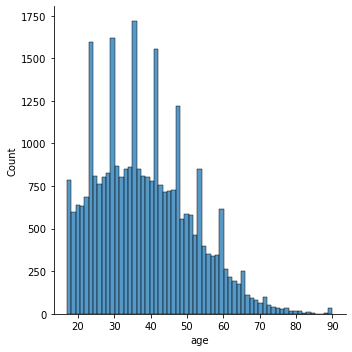

In [8]:
sn.displot(data=df, x='age')

In [9]:
df['age'] = pd.Series(np.log(df['age']))

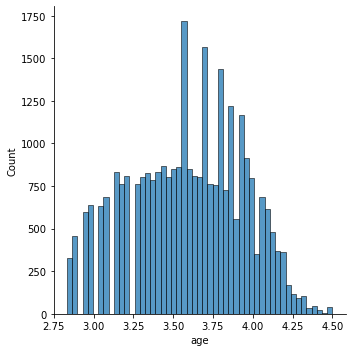

In [10]:
sn.displot(data=df, x='age')

**fnlwgt**

the graph is more to be right skewed than being normal, so let's take the log this might make it normally distributed

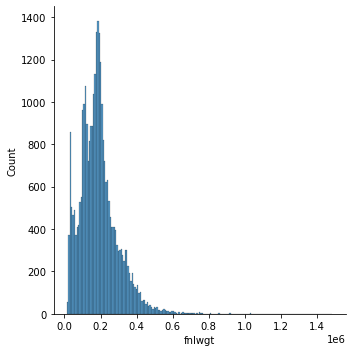

In [11]:
sn.displot(data=df, x= 'fnlwgt')

In [12]:
df['fnlwgt'] = pd.Series(np.log(df['fnlwgt']))

**native country**

we can see that most of the data are for United States people, other countries have few rows, so they won't help much in the model

therefore we can change this column values to be {United States, Not United States}

In [13]:
df['native.country'].value_counts()
# threshold = 20

United-States                 27504
Mexico                          610
?                               556
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

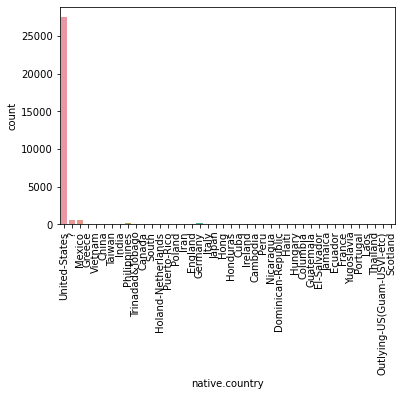

In [14]:
sn.countplot(data=df, x='native.country')
plt.xticks(rotation = 90);

In [15]:
df = df[df['native.country']!='?']
df['native.country']=df['native.country'].apply(lambda x : 'Not-United-States' if x != 'United-States' else 'United-States')
df['native.country'].value_counts()

United-States        27504
Not-United-States     2658
Name: native.country, dtype: int64

## Bivariant Exploration

**income & fnlwgt**

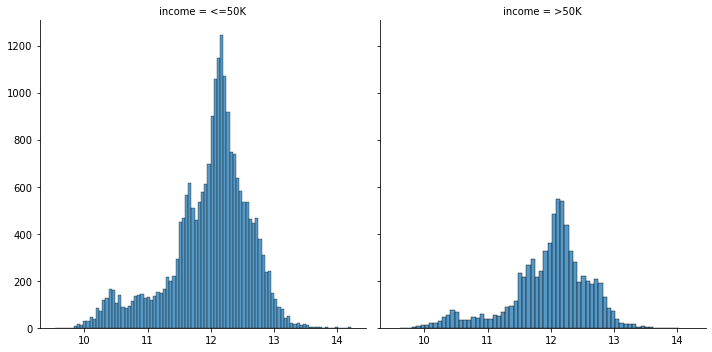

In [16]:
g = sn.FacetGrid(df, col = "income", height= 5)
g.map_dataframe(sn.histplot, x='fnlwgt')

**income & age**

from the graphs we can see that the distribution of age differes depending on the income value

first graph:
    the graph is for people with income less or equal 50k$, we can see that more young people with ages range from 20 to 30 are more likely to have low income

second graph:
    the graph is for people with income > 50k$, we can see that it supports our findings from the first graph, people with ages range from 20 to 30 are more likely to have low income, but older people are more likely to have high income, maybe that's due to experience as people with more experience are more likely to be employed with high salary

so to conclude, age seems to play a critical rule in determining the individual income

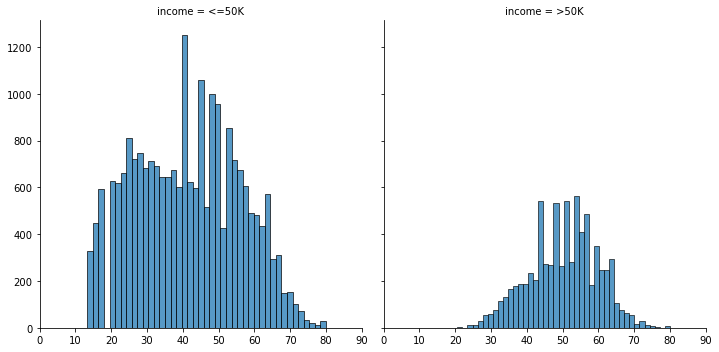

In [17]:
xticks = ['0','10','20','30','40','50','60','70','80','90']

g = sn.FacetGrid(df, col = "income", height= 5)
g.map_dataframe(sn.histplot, x='age')
g.set_xticklabels(xticks);

**income & capital.gain**

after investigating **capital.gain** column, we can see that there are many rows with 0 value for both categories of income, but larger values affect individual income significantly, so we keep it

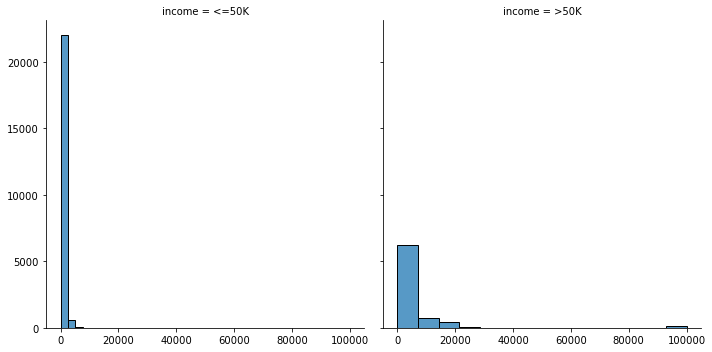

In [18]:
g = sn.FacetGrid(df, col = "income", height= 5)
g.map_dataframe(sn.histplot, x='capital.gain')

**income & capital.loss**

for **capital.loss**, I will drop it too, although values greater than 0 affect the income, but alot of zeros may harm our model so we drop it

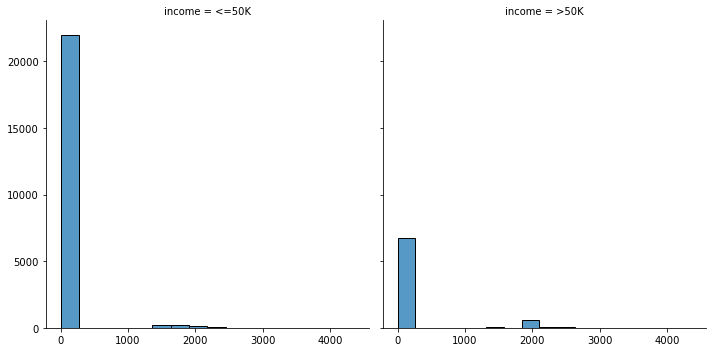

In [19]:
g = sn.FacetGrid(df, col = "income", height= 5)
g.map_dataframe(sn.histplot, x='capital.loss')

In [20]:
df.drop(columns=['capital.loss'], inplace = True, axis = 1)

**income & Education**

from the two graphs we can see that people with lower years of education are more likely to have lower income, and that makes sense actually, so this feature is critical to predict the income of an individual

and we can see that these two columns derive the same meaning, so we must drop one of them , but which one to drop, the categorical or the numeric?

since the categorical column must be encoded later when we build our model, so we can use the numeric column instead and save some effort

**to sum up** : education is important to predict an individual income, but there are two columns derive the same meaning and we will use the numeric one


<AxesSubplot:xlabel='income', ylabel='education.num'>

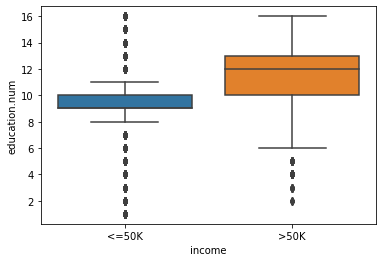

In [21]:
sn.boxplot(data= df, x="income", y= 'education.num')

<AxesSubplot:xlabel='count', ylabel='education'>

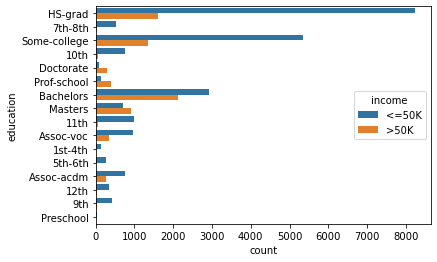

In [22]:
sn.countplot(data=df,y = 'education', hue = "income")

In [23]:
df.drop(columns=['education'], axis = 1, inplace= True)
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,hours.per.week,native.country,income
1,4.406719,Private,11.797126,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,18,United-States,<=50K
3,3.988984,Private,11.851959,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,40,United-States,<=50K
4,3.713572,Private,12.486213,10,Separated,Prof-specialty,Own-child,White,Female,0,40,United-States,<=50K
5,3.526361,Private,12.287026,9,Divorced,Other-service,Unmarried,White,Female,0,45,United-States,<=50K
6,3.637586,Private,11.922389,6,Separated,Adm-clerical,Unmarried,White,Male,0,40,United-States,<=50K


**income & hours per week**

as expected, the more the individual work, the higher the income
so for people who have <40 hours per week are more likely to have income <=50K

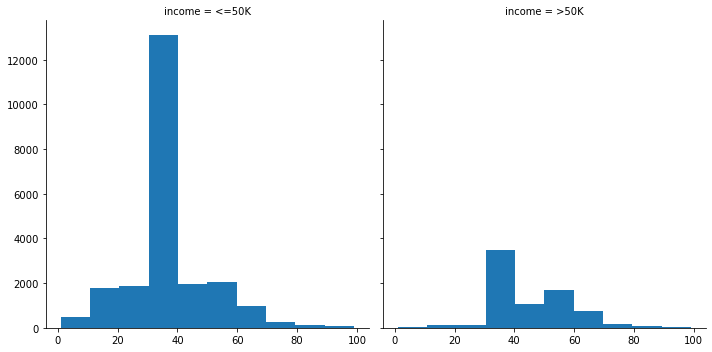

In [24]:
g = sn.FacetGrid(df, col = "income", height= 5)
g.map_dataframe(plt.hist, x='hours.per.week')

**income & marital status**

from the graph, it seems that **marital.status** has impact on individual income, so we will keep it

we can see that some values can be combined together, like Separted and Married-Spouse-absent, so let's change Married-spouse-absent to be Separted

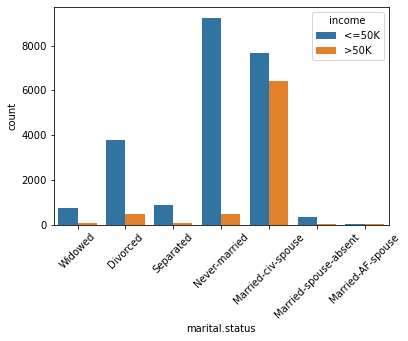

In [25]:
sn.countplot(data=df, x= 'marital.status', hue = 'income')
plt.xticks(rotation = 45);

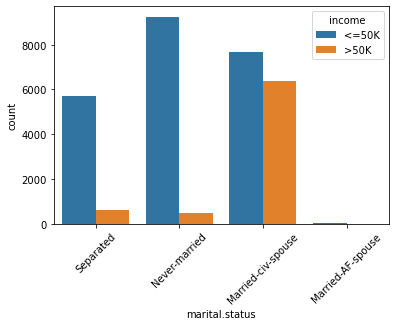

In [26]:
df['marital.status'] = df['marital.status'].replace({"Married-spouse-absent": "Separated", "Divorced":"Separated", "Widowed":"Separated"})
sn.countplot(data=df, x= 'marital.status', hue = 'income')
plt.xticks(rotation = 45);

In [27]:
pd.get_dummies(df).head()

,age,fnlwgt,education.num,capital.gain,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,native.country_Not-United-States,native.country_United-States,income_<=50K,income_>50K
1,4.406719,11.797126,9,0,18,0,0,1,0,0,...,0,0,0,1,1,0,0,1,1,0
3,3.988984,11.851959,4,0,40,0,0,1,0,0,...,0,0,0,1,1,0,0,1,1,0
4,3.713572,12.486213,10,0,40,0,0,1,0,0,...,0,0,0,1,1,0,0,1,1,0
5,3.526361,12.287026,9,0,45,0,0,1,0,0,...,0,0,0,1,1,0,0,1,1,0
6,3.637586,11.922389,6,0,40,0,0,1,0,0,...,0,0,0,1,0,1,0,1,1,0


# Building the Model

In [28]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
train_data = df.iloc[:,:10]
trian_label_data = df['income'].replace({">50K":1, "<=50K":0})
train_data = pd.get_dummies(train_data)
train_data

,age,fnlwgt,education.num,capital.gain,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
1,4.406719,11.797126,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,3.988984,11.851959,4,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,3.713572,12.486213,10,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
5,3.526361,12.287026,9,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6,3.637586,11.922389,6,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.091042,12.644818,10,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32557,3.295837,12.458006,12,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32558,3.688879,11.947134,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32559,4.060443,11.931044,9,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_data, trian_label_data, test_size = 0.3, random_state = 42, shuffle = True)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test);

In [31]:
model = GradientBoostingClassifier(max_depth = 5, random_state = 42).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(str(round(accuracy_score(y_test, y_pred)*100, 2))+"%")

86.09%
